<a href="https://colab.research.google.com/github/YagoWagner/Alura/blob/main/Aula_03_Imers%C3%A3o_de_dados_Python_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crie gráficos e conte histórias com dados


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.columns = ['ano', 'senioridade', 'contrato', 'cargo',
               'salario', 'moeda', 'usd', 'residencia',
               'remoto', 'empresa', 'tamanho_empresa']
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


<Axes: title={'center': 'Distribuição dos níveis de experiência'}, xlabel='senioridade'>

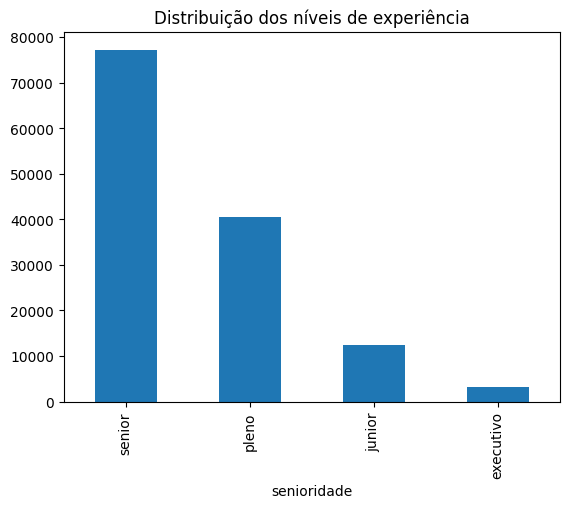

In [ ]:
df['senioridade'].value_counts().plot(kind='bar', title='Distribuição dos níveis de experiência')

## Criando o primeiro gráfico com Seaborn

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

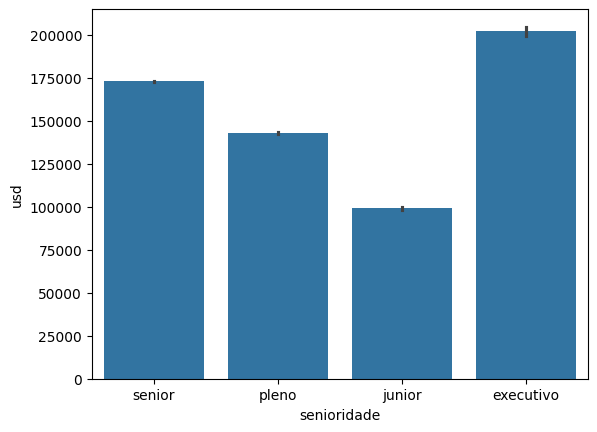

In [9]:
sns.barplot(data=df, x='senioridade', y='usd', estimator='mean')

## Formatando o gráfico com Matplotlib

In [10]:
import matplotlib.pyplot as plt

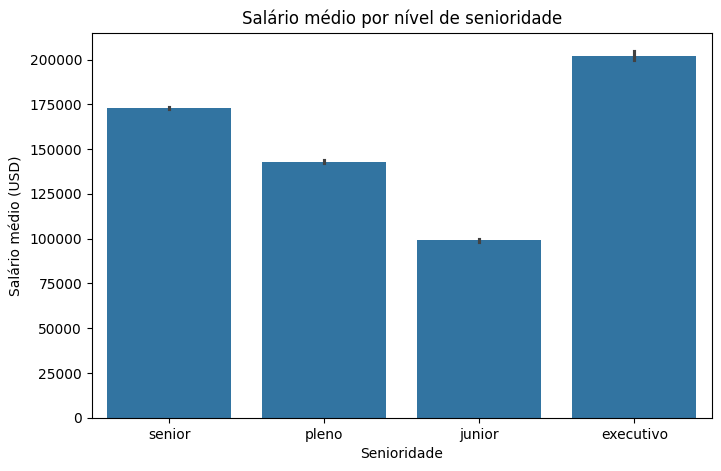

In [11]:
plt.figure(figsize=(8, 5))  # Define o tamanho da figura
sns.barplot(data=df, x='senioridade', y='usd', estimator='mean') # Cria o gráfico de barras
plt.title('Salário médio por nível de senioridade') # Define o título do gráfico
plt.ylabel('Salário médio (USD)') # Define o rótulo do eixo Y
plt.xlabel('Senioridade') # Define o rótulo do eixo X
plt.show()  # Exibe o gráfico

In [12]:
df.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
executivo,202027.667813
senior,172850.003845
pleno,143041.323489
junior,99039.040264


In [13]:
ordem = df.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

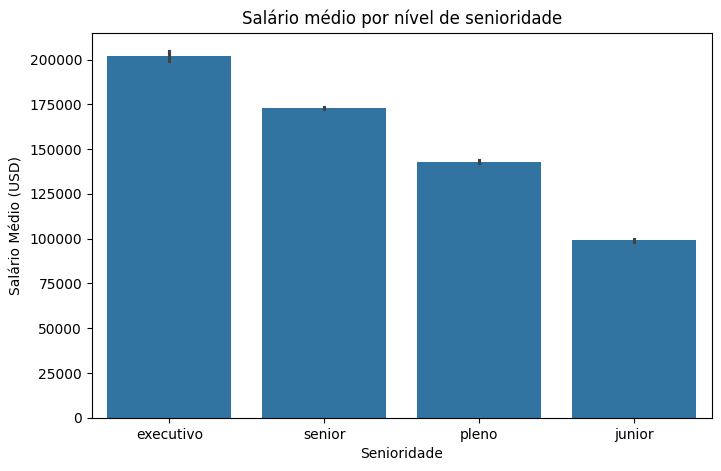

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='senioridade', y='usd', estimator='mean', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.ylabel('Salário Médio (USD)')
plt.xlabel('Senioridade')
plt.show()

## Analisando a distribuição dos salários
### Histograma

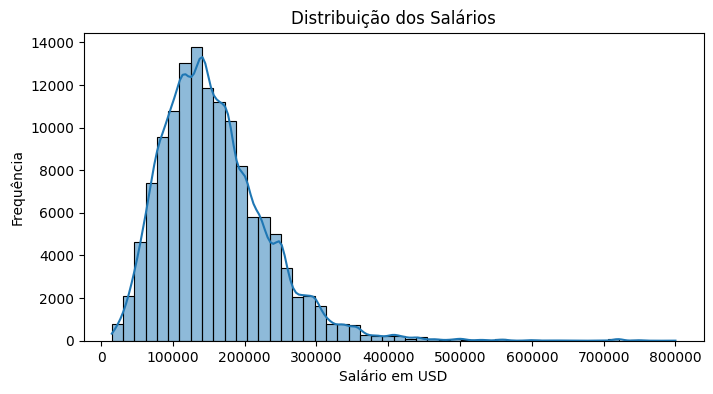

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df['usd'], bins=50, kde=True)
plt.title('Distribuição dos Salários')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

### Boxplot

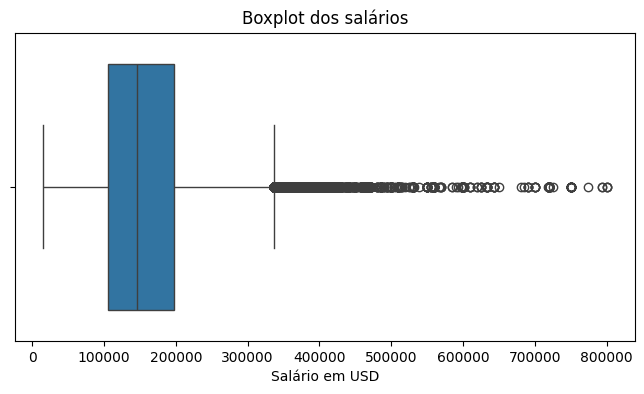

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['usd'])
plt.title('Boxplot dos salários')
plt.xlabel('Salário em USD')
plt.show()


### Como é a distribuição dos salários de acordo com níveis de senioridade?

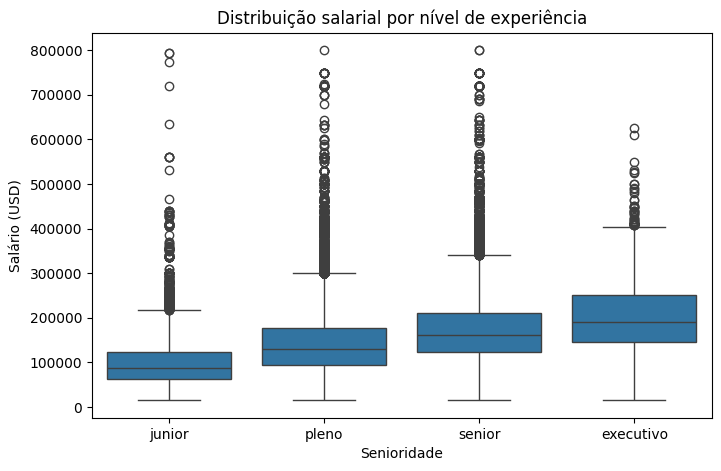

In [20]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade)
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()


Se quisermos adicionar uma paleta de cores:


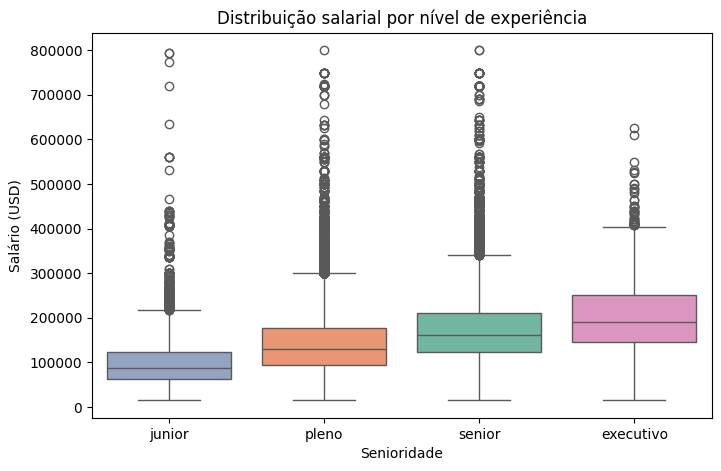

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()

### Qual país paga o maior média salarial para cientistas de dados especificamente?

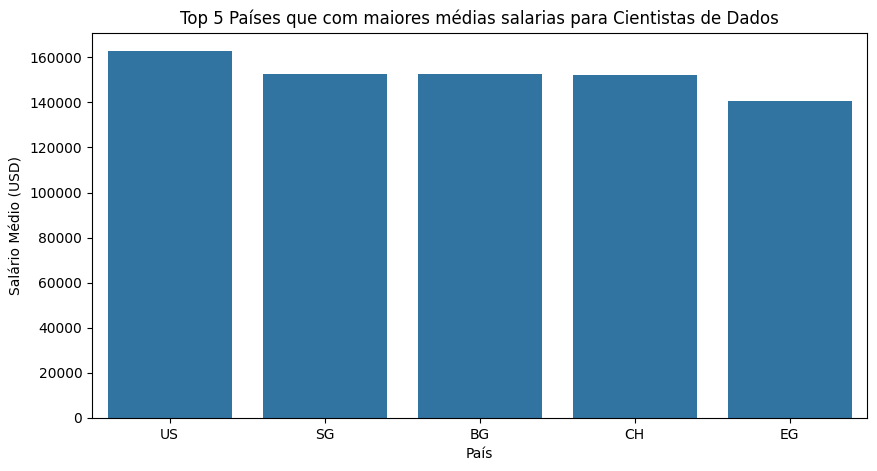

In [22]:
df_ds = df[df['cargo'] == 'Data Scientist']
media_ds = df_ds.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='residencia', y='usd', data=media_ds.head(5))
plt.title('Top 5 Países que com maiores médias salarias para Cientistas de Dados')
plt.xlabel('País')
plt.ylabel('Salário Médio (USD)')
plt.show()

US - Estados Unidos

SG - Singapura

BG - Bulgária

CH - Suiça

EG - Egito

### Criando gráficos interativos com Plotly

In [23]:
import plotly.express as px

#### Qual é a média salarial por nível de senioridade?

In [24]:
# Calcular média salarial
media_senioridade = df.groupby('senioridade')['usd'].mean().reset_index()

# Criar gráfico
fig = px.bar(media_senioridade, x='senioridade', y='usd',
             title='Salário Médio por Nível de Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio (USD)'},
             color='senioridade')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

### Qual é a proporção dos tipos de trabalho?

In [25]:
remoto_contagem = df['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos Tipos de Trabalho',
    hole=0.5  # opcional: transforma em donut chart
)
fig.update_traces(textinfo='percent+label')
fig.show()

### Qual é o Top 5 de melhores médias salariais por cargo?

In [26]:
top_cargos = df.groupby('cargo')['usd'].mean().round(2).sort_values(ascending=False).head().reset_index()
top_cargos

,cargo,usd
0,Research Team Lead,450000.0
1,Analytics Engineering Manager,399880.0
2,Data Science Tech Lead,375000.0
3,Applied AI ML Lead,292500.0
4,Head of Applied AI,273875.0


In [27]:
# Gráfico interativo
fig = px.bar(
    top_cargos,
    x='cargo',
    y='usd',
    title='Top 5 cargos com maiores médias salariais',
    labels={'usd': 'Salário médio (USD)', 'cargo': 'Cargo'}
)
fig.update_layout(xaxis_title='Cargo', yaxis_title='Salário médio (USD)')
fig.show()

### Mapa do salário médio do Cientista de Dados por país

In [29]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 64.2 MB/s eta 0:00:00


In [30]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df['residencia_iso3'] = df['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df[df['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [31]:
df.to_csv('dados-imersao-final.csv', index=False)